In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Common activation functions and derivatives
def sign(x):
    return np.array(x > 0, dtype=int)

def d_sign(x):
    return np.zeros_like(x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s*(1-s)

def softmax(x):
    # 減去最大值以防止 np.exp() 溢出
    shift_x = x - np.max(x)
    exp_x = np.exp(shift_x)
    return exp_x / np.sum(exp_x)

def d_softmax(x):
    s = softmax(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return np.where(x>0, 1, 0)

def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.tanh(x)**2

def leaky_relu(x, alpha=0.01):
    return np.where(x>0, x, alpha*x)

def d_leaky_relu(x, alpha=0.01):
    return np.where(x>0, 1, alpha)

# Loss functions & derivatives
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def d_mse(y, y_hat):
    return 2*(y_hat - y) / len(y)

def mae(y, y_hat):
    return np.mean(np.abs(y - y_hat))

def d_mae(y, y_hat):
    return np.where(y_hat > y, 1, -1) / len(y)

def binary_cross_entropy(y, y_hat):
    eps = 1e-12
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def d_binary_cross_entropy(y, y_hat):
    eps = 1e-12
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return (y_hat - y) / (y_hat*(1-y_hat)*len(y))

In [2]:
# 產生 6 個範圍在 -100 到 100 之間的隨機浮點數
random_data = np.random.uniform(-100, 100, size=6)

print(f"隨機測試數據: \n{random_data}\n")
print("="*50)

act_funs = [
    ("Sign", sign, d_sign),
    ("Sigmoid", sigmoid, d_sigmoid),
    ("Softmax", softmax, d_softmax),
    ("ReLU", relu, d_relu),
    ("Tanh", tanh, d_tanh),
    ("Leaky ReLU", leaky_relu, d_leaky_relu)
]

for name, f, df in act_funs:
    val = f(random_data)
    d_val = df(random_data)
    print(f"[{name}]")
    print(f"  結果: {val}")
    print(f"  導數: {d_val}\n")

隨機測試數據: 
[ 62.24609498 -15.37414633  49.14707497 -97.27282365 -33.22879435
  98.66415837]

[Sign]
  結果: [1 0 1 0 0 1]
  導數: [0. 0. 0. 0. 0. 0.]

[Sigmoid]
  結果: [1.00000000e+00 2.10422896e-07 1.00000000e+00 5.68786724e-43
 3.70610717e-15 1.00000000e+00]
  導數: [0.00000000e+00 2.10422852e-07 0.00000000e+00 5.68786724e-43
 3.70610717e-15 0.00000000e+00]

[Softmax]
  結果: [1.52698942e-16 2.97710083e-50 3.12610758e-22 8.04729476e-86
 5.24346572e-58 1.00000000e+00]
  導數: [1.52698942e-16 2.97710083e-50 3.12610758e-22 8.04729476e-86
 5.24346572e-58 2.22044605e-16]

[ReLU]
  結果: [62.24609498  0.         49.14707497  0.          0.         98.66415837]
  導數: [1 0 1 0 0 1]

[Tanh]
  結果: [ 1. -1.  1. -1. -1.  1.]
  導數: [0.00000000e+00 1.77191595e-13 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

[Leaky ReLU]
  結果: [62.24609498 -0.15374146 49.14707497 -0.97272824 -0.33228794 98.66415837]
  導數: [1.   0.01 1.   0.01 0.01 1.  ]



## 啟動函數圖形

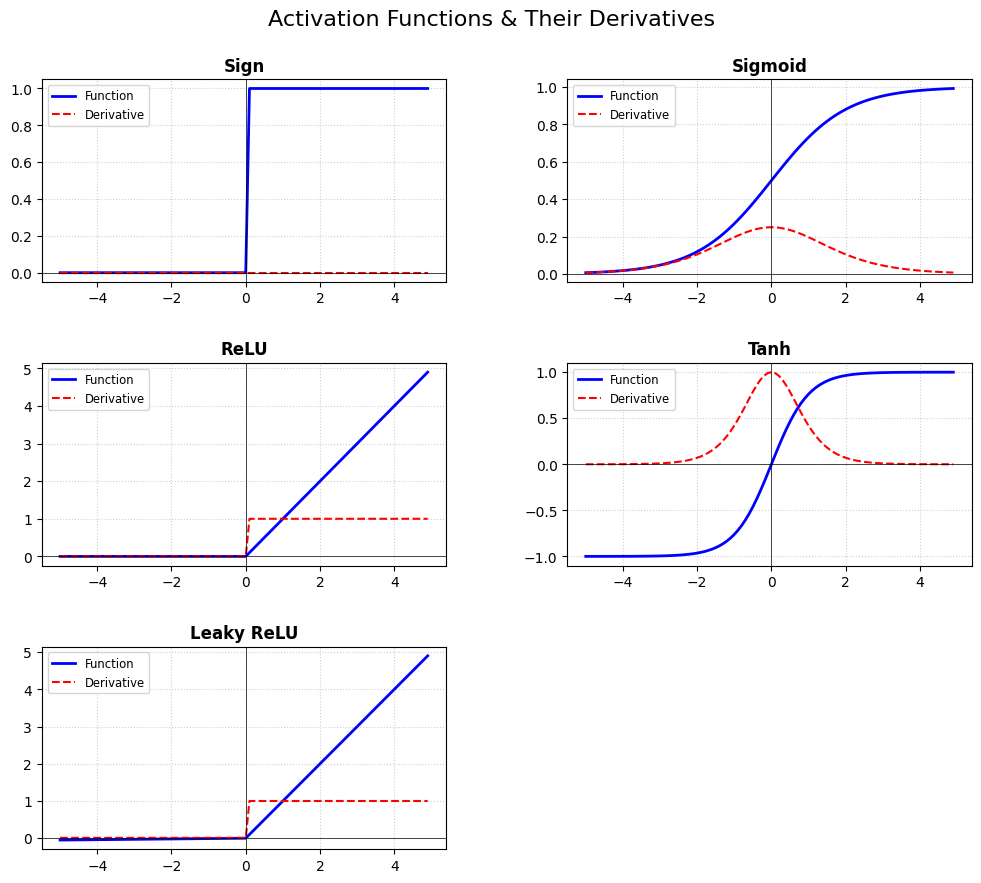

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- 設定繪圖數據 ---
x = np.arange(-5, 5, 0.1)
funcs = [
    ("Sign", sign, d_sign),
    ("Sigmoid", sigmoid, d_sigmoid),
    ("ReLU", relu, d_relu),
    ("Tanh", tanh, d_tanh),
    ("Leaky ReLU", leaky_relu, d_leaky_relu)
]

# --- 開始畫圖 ---
plt.figure(figsize=(12, 10)) # 設定畫布大小
plt.subplots_adjust(hspace=0.4, wspace=0.3) # 調整子圖間距

for i, (name, f, df) in enumerate(funcs, 1):
    plt.subplot(3, 2, i) # 建立 3列 2欄 的子圖

    # 繪製函數與導函數
    plt.plot(x, f(x), label="Function", color='blue', linewidth=2)
    plt.plot(x, df(x), label="Derivative", color='red', linestyle='--', linewidth=1.5)

    # 優化細節
    plt.axhline(0, color='black', linewidth=0.5) # x 軸線
    plt.axvline(0, color='black', linewidth=0.5) # y 軸線
    plt.title(f"{name}", fontsize=12, fontweight='bold')
    plt.grid(True, which='both', linestyle=':', alpha=0.6)
    plt.legend(loc='upper left', fontsize='small')

plt.suptitle("Activation Functions & Their Derivatives", fontsize=16, y=0.95)
plt.show()

## 損失函數圖形

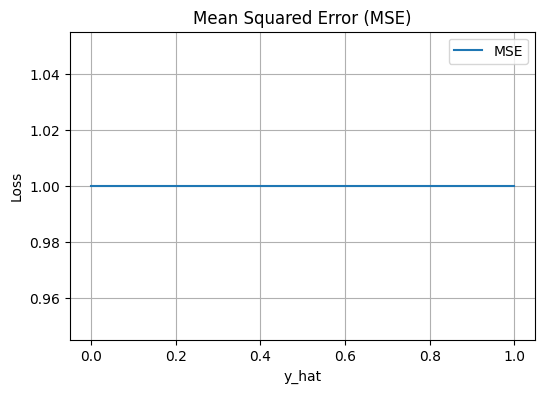

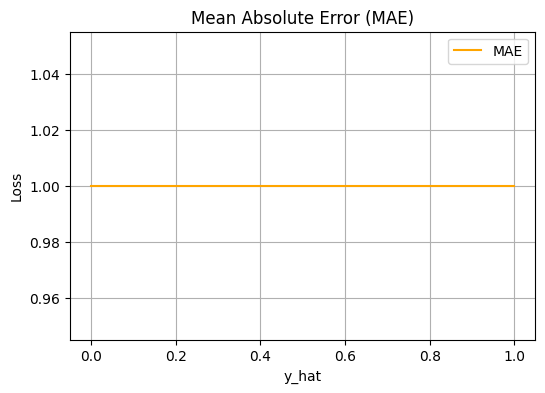

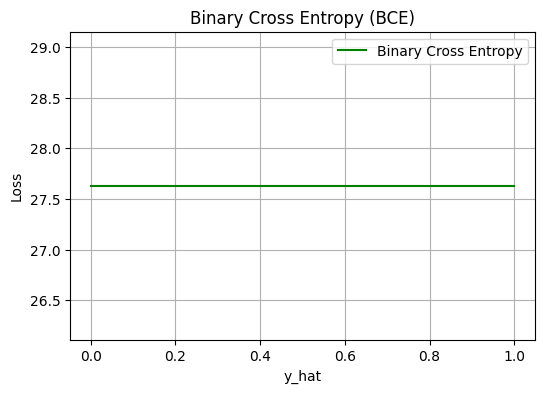

In [6]:
# Plot loss functions separately
y = np.array([1]*100)
y_hat_vals = np.linspace(0.001, 0.999, 100)

mse_vals = [mse(y, np.full_like(y, v)) for v in y_hat_vals]
mae_vals = [mae(y, np.full_like(y, v)) for v in y_hat_vals]
bce_vals = [binary_cross_entropy(y, np.full_like(y, v)) for v in y_hat_vals]

# MSE
plt.figure(figsize=(6,4))
plt.plot(y_hat_vals, mse_vals, label="MSE")
plt.title("Mean Squared Error (MSE)")
plt.xlabel("y_hat")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# MAE
plt.figure(figsize=(6,4))
plt.plot(y_hat_vals, mae_vals, label="MAE", color="orange")
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("y_hat")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Binary Cross Entropy
plt.figure(figsize=(6,4))
plt.plot(y_hat_vals, bce_vals, label="Binary Cross Entropy", color="green")
plt.title("Binary Cross Entropy (BCE)")
plt.xlabel("y_hat")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


In [9]:
sigmoid(-1)

np.float64(0.2689414213699951)